In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split #훈련용과 테스트용을 나눠주는 모듈

#pip install mglearn

import mglearn

w[0]: 0.393906  b: -0.031804


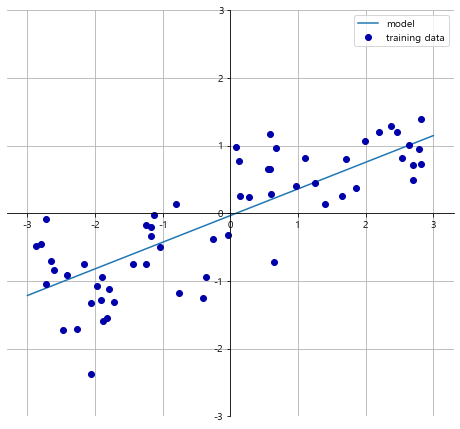

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression

X,y =mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)   #2차원

In [4]:
print(lr.coef_, ir.intercept_)
print(lr.score(X_train,y_train))


NameError: name 'ir' is not defined

In [ ]:
# 주제 : 전기 생산량과 소비량
# 귀무가설: 전기 생산량과 소비량은 상관관계가 없다
# 대립가설: 전기 생산량과 소비량은 상관관계가 있다

# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [ ]:
from scipy import stats

result = stats.linregress(X,y)
result
# p-value 가 유의수준보다 작다. -> 대립가설 채택. 따라서 회귀분석을 할 가치가 있다.

In [ ]:
#  Ir = LinearRegression().fit(X_train, y_train) # 지금은 1차원. 2차원으로 바꿔줘야

num = np.array(X)
num = num.reshape(-1,1)
lr = LinearRegression().fit(num, y)

In [ ]:
lr.coef_, lr.intercept_

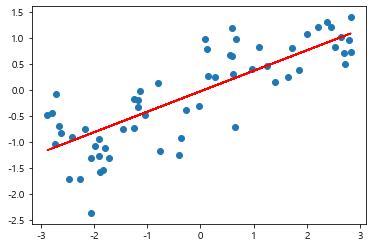

In [5]:
plt.scatter(X,y)
plt.plot(np.array(X), lr.coef_*np.array(X) + lr.intercept_ , c="red") 

In [6]:
# 생산량이 5일때 사용량은 얼마일까?

5*lr.coef_ + lr.intercept_ 

array([1.93772341])

# 선형회귀
    1) 단일 선형 회귀 : 독립변수 하나(x)에 종속변수 하나(y)
    2) 다중 선형 회귀

In [7]:
# 보스톤 주택 가격
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape  #독립변수가 13개. 집값에 영향을 미치는 요인이 13개

(506, 13)

In [8]:
X,y = mglearn.datasets.load_extended_boston()
X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [9]:
lr = LinearRegression().fit(X_train, y_train)

In [10]:
print("훈련 점수 : " , lr.score(X_train, y_train))
print("테스트 점수 : " , lr.score(X_test, y_test))

훈련 점수 :  0.9520519609032729
테스트 점수 :  0.6074721959665803


도마뱀책 184- 190 페이지

### 릿지(Ridge) 회귀모델
    + L2 (거리 계산시 최단거리 방식) 규제 (Regularization)
    + MSE항에 Penalty항 추가
    + 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소), 작게 하면 그 반대가 된다

### 라쏘(Lasso) 회귀모델
    + L1 규제 사용
    + 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소), 작게 하면 그 반대가 된다 
    + 특성 선택이 자동으로 이루어진다.
    
### 엘라스틱넷 (ElasticNet) 회귀모델
    (Ridge)+(Lasso) 

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)   #alpha = 1.0

print("훈련 점수 : " , ridge.score(X_train, y_train))
print("테스트 점수 : " , ridge.score(X_test, y_test))

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744752


In [12]:

ridge10 = Ridge(alpha = 10).fit(X_train, y_train)   
#alpha = 10  으로 더 크게. 규제를 더 강화한다. 과대적합에 더 많이 관여한다. 모델의 복잡도를 단순화한다. (규제한다)

print("훈련 점수 : " , ridge10.score(X_train, y_train))
print("테스트 점수 : " , ridge10.score(X_test, y_test))

훈련 점수 :  0.7882787115369616
테스트 점수 :  0.6359411489177311


In [13]:

ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)   
#alpha = 0.1  으로 더 작게

print("훈련 점수 : " , ridge01.score(X_train, y_train))
print("테스트 점수 : " , ridge01.score(X_test, y_test))

훈련 점수 :  0.9282273685001985
테스트 점수 :  0.7722067936479811


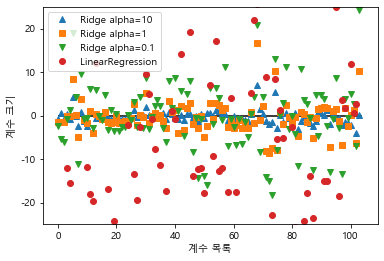

In [14]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

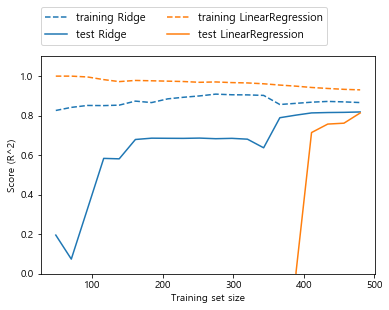

In [15]:
# 알파값을 f로 고정시킨 상태에서  데이터의 크기 조절
mglearn.plots.plot_ridge_n_samples()

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)   

print("훈련 점수 : " , lasso.score(X_train, y_train))
print("테스트 점수 : " , lasso.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso.coef_ !=0))

훈련 점수 :  0.29323768991114607
테스트 점수 :  0.20937503255272294
사용한 특성의 수 :  4


In [17]:

lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)   
print("훈련 점수 : " , lasso001.score(X_train, y_train))
print("테스트 점수 : " ,lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ !=0))

훈련 점수 :  0.8961122320864717
테스트 점수 :  0.7677995670886713
사용한 특성의 수 :  32


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  positive)


In [18]:

lasso00001 = Lasso(alpha = 0.0001).fit(X_train, y_train)   
print("훈련 점수 : " , lasso00001.score(X_train, y_train))
print("테스트 점수 : " ,lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ !=0))  #과대적합
#alpha값을 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

훈련 점수 :  0.9420931515237063
테스트 점수 :  0.6976541391663642
사용한 특성의 수 :  100


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  positive)


# Boston housing sample을 이용한 다중선형회귀

In [19]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
model_boston = LinearRegression().fit(boston.data, boston.target)


In [21]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [22]:
df = pd.DataFrame(boston.data, columns = [boston.feature_names])
# df.head(10)
df['MEDV'] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


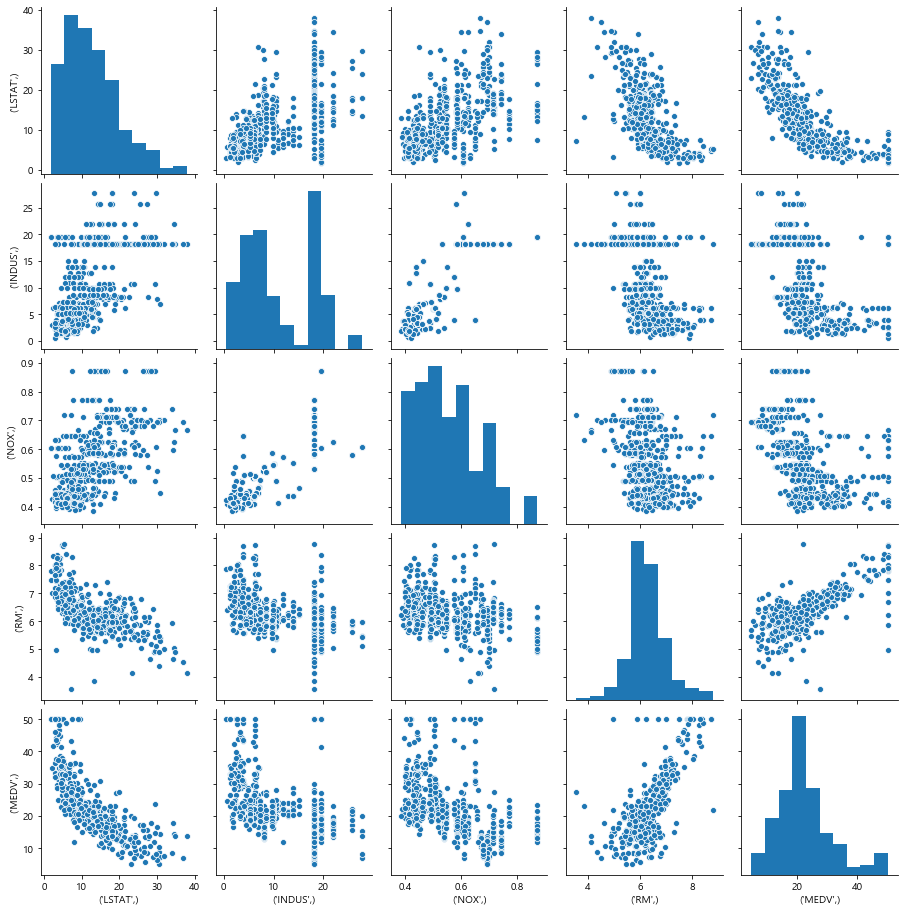

In [23]:

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size = 2.5)


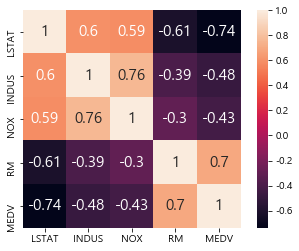

In [27]:
cc = np.corrcoef(df[cols].values.T)
cc
sns.heatmap(cc, yticklabels=cols, xticklabels=cols, annot=True, square=True, annot_kws={'size':15})


In [28]:
# 방이 10개일 때 집값은 얼마인가?
X = df[['RM']].values
y = df[['MEDV']].values

lr = LinearRegression().fit(X, y)

In [29]:
house_price = lr.predict(np.array([[10]]))
print(house_price * 1000)

[[56350.46903536]]
